**Final Project**

**course**: *Hardware and software for Big data*

University of Naples Federico II

**Prof.GIANCARLO SPERLI**

Greoup members:

Seyyed Alireza Khoshsolat

Farshad Farahtaj


## instaling kafka and yahoo finance

In [1]:
!pip install kafka-python
!pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 4.8 MB/s eta 0:00:00


# adding libraries

In [2]:
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# download Apache Kafka and extract it and prepare for use

In [3]:
#!curl -sSOL https://dlcdn.apache.org/kafka/3.1.0/kafka_2.13-3.1.0.tgz
!curl -sSOL https://archive.apache.org/dist/kafka/3.3.1/kafka_2.13-3.3.1.tgz
!tar -xzf kafka_2.13-3.3.1.tgz
#!tar -xzf kafka_2.13-3.1.0.tgz

# startup the Apache Kafka and Zookeeper

In [4]:
!./kafka_2.13-3.3.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.13-3.3.1/config/zookeeper.properties
!./kafka_2.13-3.3.1/bin/kafka-server-start.sh -daemon ./kafka_2.13-3.3.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


# Download all stocks and send each stock to a Kafka topic

In [5]:
# Define the Kafka broker
bootstrap_servers = '127.0.0.1:9092'

# Create a Kafka producer
producer = KafkaProducer(bootstrap_servers=bootstrap_servers)

# List of stock tickers (rearranged and added new ones)
all_tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA', 'NVDA', 'PYPL', 'INTC', 'CSCO', 'AMD',
               'V', 'GS', 'BA', 'IBM', 'PG', 'JPM', 'C', 'NFLX', 'CVS', 'CLSK', 'CME', 'PEP',
               'SPGI', 'CMCSA', 'FDX', 'JNJ', 'MRK', 'REGN', 'UNH', 'DIS', 'EBAY', 'INTU',
               'GE', 'HD', 'BAC', 'MS', 'MMM', 'GGAL', 'PFE', 'T', 'WMT', 'MCD', 'VZ', 'WBA',
               'NKE', 'SOFI', 'AAP', 'CVX', 'NOW', 'AFRM', 'XOM', 'AMGN', 'MU', 'LOW', 'TRV']

# Set the time period for 6 months
start_date = '2023-04-01'
end_date = '2023-09-30'

# Fetch stock data and send it to Kafka topic
for ticker in all_tickers:
    # Create a topic for each stock
    topic = f'stock_{ticker}'

    data = yf.download(ticker, start=start_date, end=end_date, interval='1d')

    for index, row in data.iterrows():
        # Convert data to a string and send it to the respective Kafka topic
        index_str = str(index)
        message = f"{ticker},{index},{row['Open']},{row['High']},{row['Low']},{row['Close']},{row['Volume']}"
        producer.send(topic, value=message.encode('utf-8'), key=index_str.encode('utf-8'))
        print(f"Sent message for {ticker}, index {index} to topic {topic}")

# Close the Kafka producer
producer.close()


[*********************100%%**********************]  1 of 1 completed


Sent message for AAPL, index 2023-04-03 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-04 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-05 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-06 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-10 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-11 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-12 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-13 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-14 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-17 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-18 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-19 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-20 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-04-21 00:00:00 to topic stock_AAPL
Sent message for AAPL, index 2023-

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for AMZN, index 2023-04-03 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-04 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-05 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-06 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-10 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-11 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-12 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-13 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-14 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-17 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-18 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-19 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-20 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-04-21 00:00:00 to topic stock_AMZN
Sent message for AMZN, index 2023-

Sent message for GOOGL, index 2023-04-03 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-04 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-05 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-06 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-10 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-11 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-12 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-13 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-14 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-17 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-18 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-19 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-20 00:00:00 to topic stock_GOOGL
Sent message for GOOGL, index 2023-04-21 00:00:00 to topic stock_GOOGL
Sent m

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Sent message for MSFT, index 2023-04-03 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-04 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-05 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-06 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-10 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-11 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-12 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-13 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-14 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-17 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-18 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-19 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-20 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-04-21 00:00:00 to topic stock_MSFT
Sent message for MSFT, index 2023-

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for NVDA, index 2023-04-03 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-04 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-05 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-06 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-10 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-11 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-12 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-13 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-14 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-17 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-18 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-19 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-20 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-04-21 00:00:00 to topic stock_NVDA
Sent message for NVDA, index 2023-

Sent message for PYPL, index 2023-04-03 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-04 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-05 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-06 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-10 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-11 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-12 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-13 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-14 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-17 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-18 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-19 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-20 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-04-21 00:00:00 to topic stock_PYPL
Sent message for PYPL, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for INTC, index 2023-04-03 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-04 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-05 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-06 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-10 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-11 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-12 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-13 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-14 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-17 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-18 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-19 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-20 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-04-21 00:00:00 to topic stock_INTC
Sent message for INTC, index 2023-

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for CSCO, index 2023-04-03 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-04 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-05 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-06 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-10 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-11 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-12 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-13 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-14 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-17 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-18 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-19 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-20 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-04-21 00:00:00 to topic stock_CSCO
Sent message for CSCO, index 2023-


[*********************100%%**********************]  1 of 1 completed

Sent message for AMD, index 2023-04-03 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-04 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-05 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-06 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-10 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-11 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-12 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-13 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-14 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-17 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-18 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-19 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-20 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-21 00:00:00 to topic stock_AMD
Sent message for AMD, index 2023-04-24 00:00:00 to topic stock

Sent message for V, index 2023-04-03 00:00:00 to topic stock_V
Sent message for V, index 2023-04-04 00:00:00 to topic stock_V
Sent message for V, index 2023-04-05 00:00:00 to topic stock_V
Sent message for V, index 2023-04-06 00:00:00 to topic stock_V
Sent message for V, index 2023-04-10 00:00:00 to topic stock_V
Sent message for V, index 2023-04-11 00:00:00 to topic stock_V
Sent message for V, index 2023-04-12 00:00:00 to topic stock_V
Sent message for V, index 2023-04-13 00:00:00 to topic stock_V
Sent message for V, index 2023-04-14 00:00:00 to topic stock_V
Sent message for V, index 2023-04-17 00:00:00 to topic stock_V
Sent message for V, index 2023-04-18 00:00:00 to topic stock_V
Sent message for V, index 2023-04-19 00:00:00 to topic stock_V
Sent message for V, index 2023-04-20 00:00:00 to topic stock_V
Sent message for V, index 2023-04-21 00:00:00 to topic stock_V
Sent message for V, index 2023-04-24 00:00:00 to topic stock_V
Sent message for V, index 2023-04-25 00:00:00 to topic 

[*********************100%%**********************]  1 of 1 completed


Sent message for GS, index 2023-04-03 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-04 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-05 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-06 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-10 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-11 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-12 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-13 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-14 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-17 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-18 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-19 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-20 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-21 00:00:00 to topic stock_GS
Sent message for GS, index 2023-04-24 00:00:00 to topic stock_GS
Sent message for GS, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for BA, index 2023-04-03 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-04 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-05 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-06 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-10 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-11 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-12 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-13 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-14 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-17 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-18 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-19 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-20 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-21 00:00:00 to topic stock_BA
Sent message for BA, index 2023-04-24 00:00:00 to topic stock_BA
Sent message for BA, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for IBM, index 2023-04-03 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-04 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-05 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-06 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-10 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-11 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-12 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-13 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-14 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-17 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-18 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-19 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-20 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-21 00:00:00 to topic stock_IBM
Sent message for IBM, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for PG, index 2023-04-03 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-04 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-05 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-06 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-10 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-11 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-12 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-13 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-14 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-17 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-18 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-19 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-20 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-21 00:00:00 to topic stock_PG
Sent message for PG, index 2023-04-24 00:00:00 to topic stock_PG
Sent message for PG, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for JPM, index 2023-04-03 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-04 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-05 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-06 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-10 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-11 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-12 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-13 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-14 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-17 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-18 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-19 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-20 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-21 00:00:00 to topic stock_JPM
Sent message for JPM, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for C, index 2023-04-03 00:00:00 to topic stock_C
Sent message for C, index 2023-04-04 00:00:00 to topic stock_C
Sent message for C, index 2023-04-05 00:00:00 to topic stock_C
Sent message for C, index 2023-04-06 00:00:00 to topic stock_C
Sent message for C, index 2023-04-10 00:00:00 to topic stock_C
Sent message for C, index 2023-04-11 00:00:00 to topic stock_C
Sent message for C, index 2023-04-12 00:00:00 to topic stock_C
Sent message for C, index 2023-04-13 00:00:00 to topic stock_C
Sent message for C, index 2023-04-14 00:00:00 to topic stock_C
Sent message for C, index 2023-04-17 00:00:00 to topic stock_C
Sent message for C, index 2023-04-18 00:00:00 to topic stock_C
Sent message for C, index 2023-04-19 00:00:00 to topic stock_C
Sent message for C, index 2023-04-20 00:00:00 to topic stock_C
Sent message for C, index 2023-04-21 00:00:00 to topic stock_C
Sent message for C, index 2023-04-24 00:00:00 to topic stock_C
Sent message for C, index 2023-04-25 00:00:00 to topic 

Sent message for NFLX, index 2023-04-03 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-04 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-05 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-06 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-10 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-11 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-12 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-13 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-14 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-17 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-18 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-19 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-20 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-04-21 00:00:00 to topic stock_NFLX
Sent message for NFLX, index 2023-

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Sent message for CVS, index 2023-04-03 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-04 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-05 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-06 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-10 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-11 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-12 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-13 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-14 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-17 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-18 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-19 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-20 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-21 00:00:00 to topic stock_CVS
Sent message for CVS, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for CME, index 2023-04-03 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-04 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-05 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-06 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-10 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-11 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-12 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-13 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-14 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-17 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-18 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-19 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-20 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-21 00:00:00 to topic stock_CME
Sent message for CME, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for PEP, index 2023-04-03 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-04 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-05 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-06 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-10 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-11 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-12 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-13 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-14 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-17 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-18 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-19 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-20 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-21 00:00:00 to topic stock_PEP
Sent message for PEP, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for SPGI, index 2023-04-03 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-04 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-05 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-06 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-10 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-11 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-12 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-13 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-14 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-17 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-18 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-19 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-20 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-04-21 00:00:00 to topic stock_SPGI
Sent message for SPGI, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for CMCSA, index 2023-04-03 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-04 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-05 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-06 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-10 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-11 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-12 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-13 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-14 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-17 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-18 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-19 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-20 00:00:00 to topic stock_CMCSA
Sent message for CMCSA, index 2023-04-21 00:00:00 to topic stock_CMCSA
Sent m

[*********************100%%**********************]  1 of 1 completed


Sent message for FDX, index 2023-04-03 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-04 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-05 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-06 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-10 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-11 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-12 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-13 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-14 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-17 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-18 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-19 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-20 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-21 00:00:00 to topic stock_FDX
Sent message for FDX, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for JNJ, index 2023-04-03 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-04 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-05 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-06 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-10 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-11 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-12 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-13 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-14 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-17 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-18 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-19 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-20 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-21 00:00:00 to topic stock_JNJ
Sent message for JNJ, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Sent message for MRK, index 2023-04-03 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-04 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-05 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-06 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-10 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-11 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-12 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-13 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-14 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-17 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-18 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-19 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-20 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-21 00:00:00 to topic stock_MRK
Sent message for MRK, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for UNH, index 2023-04-03 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-04 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-05 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-06 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-10 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-11 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-12 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-13 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-14 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-17 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-18 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-19 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-20 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-21 00:00:00 to topic stock_UNH
Sent message for UNH, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for DIS, index 2023-04-03 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-04 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-05 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-06 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-10 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-11 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-12 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-13 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-14 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-17 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-18 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-19 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-20 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-21 00:00:00 to topic stock_DIS
Sent message for DIS, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for EBAY, index 2023-04-03 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-04 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-05 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-06 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-10 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-11 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-12 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-13 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-14 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-17 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-18 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-19 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-20 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-04-21 00:00:00 to topic stock_EBAY
Sent message for EBAY, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for INTU, index 2023-04-03 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-04 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-05 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-06 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-10 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-11 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-12 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-13 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-14 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-17 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-18 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-19 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-20 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-04-21 00:00:00 to topic stock_INTU
Sent message for INTU, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for GE, index 2023-04-03 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-04 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-05 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-06 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-10 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-11 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-12 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-13 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-14 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-17 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-18 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-19 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-20 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-21 00:00:00 to topic stock_GE
Sent message for GE, index 2023-04-24 00:00:00 to topic stock_GE
Sent message for GE, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for HD, index 2023-04-03 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-04 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-05 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-06 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-10 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-11 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-12 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-13 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-14 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-17 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-18 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-19 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-20 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-21 00:00:00 to topic stock_HD
Sent message for HD, index 2023-04-24 00:00:00 to topic stock_HD
Sent message for HD, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for BAC, index 2023-04-03 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-04 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-05 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-06 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-10 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-11 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-12 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-13 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-14 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-17 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-18 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-19 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-20 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-21 00:00:00 to topic stock_BAC
Sent message for BAC, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for MS, index 2023-04-03 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-04 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-05 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-06 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-10 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-11 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-12 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-13 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-14 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-17 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-18 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-19 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-20 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-21 00:00:00 to topic stock_MS
Sent message for MS, index 2023-04-24 00:00:00 to topic stock_MS
Sent message for MS, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for MMM, index 2023-04-03 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-04 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-05 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-06 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-10 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-11 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-12 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-13 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-14 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-17 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-18 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-19 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-20 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-21 00:00:00 to topic stock_MMM
Sent message for MMM, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for GGAL, index 2023-04-03 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-04 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-05 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-06 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-10 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-11 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-12 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-13 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-14 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-17 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-18 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-19 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-20 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-04-21 00:00:00 to topic stock_GGAL
Sent message for GGAL, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for PFE, index 2023-04-03 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-04 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-05 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-06 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-10 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-11 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-12 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-13 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-14 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-17 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-18 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-19 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-20 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-21 00:00:00 to topic stock_PFE
Sent message for PFE, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for T, index 2023-04-03 00:00:00 to topic stock_T
Sent message for T, index 2023-04-04 00:00:00 to topic stock_T
Sent message for T, index 2023-04-05 00:00:00 to topic stock_T
Sent message for T, index 2023-04-06 00:00:00 to topic stock_T
Sent message for T, index 2023-04-10 00:00:00 to topic stock_T
Sent message for T, index 2023-04-11 00:00:00 to topic stock_T
Sent message for T, index 2023-04-12 00:00:00 to topic stock_T
Sent message for T, index 2023-04-13 00:00:00 to topic stock_T
Sent message for T, index 2023-04-14 00:00:00 to topic stock_T
Sent message for T, index 2023-04-17 00:00:00 to topic stock_T
Sent message for T, index 2023-04-18 00:00:00 to topic stock_T
Sent message for T, index 2023-04-19 00:00:00 to topic stock_T
Sent message for T, index 2023-04-20 00:00:00 to topic stock_T
Sent message for T, index 2023-04-21 00:00:00 to topic stock_T
Sent message for T, index 2023-04-24 00:00:00 to topic stock_T
Sent message for T, index 2023-04-25 00:00:00 to topic 

[*********************100%%**********************]  1 of 1 completed


Sent message for WMT, index 2023-04-03 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-04 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-05 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-06 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-10 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-11 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-12 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-13 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-14 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-17 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-18 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-19 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-20 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-21 00:00:00 to topic stock_WMT
Sent message for WMT, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for MCD, index 2023-04-03 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-04 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-05 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-06 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-10 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-11 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-12 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-13 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-14 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-17 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-18 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-19 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-20 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-21 00:00:00 to topic stock_MCD
Sent message for MCD, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for VZ, index 2023-04-03 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-04 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-05 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-06 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-10 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-11 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-12 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-13 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-14 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-17 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-18 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-19 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-20 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-21 00:00:00 to topic stock_VZ
Sent message for VZ, index 2023-04-24 00:00:00 to topic stock_VZ
Sent message for VZ, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for WBA, index 2023-04-03 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-04 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-05 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-06 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-10 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-11 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-12 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-13 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-14 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-17 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-18 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-19 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-20 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-21 00:00:00 to topic stock_WBA
Sent message for WBA, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for NKE, index 2023-04-03 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-04 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-05 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-06 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-10 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-11 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-12 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-13 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-14 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-17 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-18 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-19 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-20 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-21 00:00:00 to topic stock_NKE
Sent message for NKE, index 2023-04-24 00:00:00 to topic stock

Sent message for SOFI, index 2023-04-03 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-04 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-05 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-06 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-10 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-11 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-12 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-13 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-14 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-17 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-18 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-19 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-20 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-04-21 00:00:00 to topic stock_SOFI
Sent message for SOFI, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for AAP, index 2023-04-03 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-04 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-05 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-06 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-10 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-11 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-12 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-13 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-14 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-17 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-18 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-19 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-20 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-21 00:00:00 to topic stock_AAP
Sent message for AAP, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for CVX, index 2023-04-03 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-04 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-05 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-06 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-10 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-11 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-12 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-13 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-14 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-17 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-18 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-19 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-20 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-21 00:00:00 to topic stock_CVX
Sent message for CVX, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Sent message for NOW, index 2023-04-03 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-04 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-05 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-06 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-10 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-11 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-12 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-13 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-14 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-17 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-18 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-19 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-20 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-21 00:00:00 to topic stock_NOW
Sent message for NOW, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Sent message for XOM, index 2023-04-03 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-04 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-05 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-06 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-10 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-11 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-12 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-13 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-14 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-17 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-18 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-19 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-20 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-21 00:00:00 to topic stock_XOM
Sent message for XOM, index 2023-04-24 00:00:00 to topic stock

Sent message for AMGN, index 2023-04-03 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-04 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-05 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-06 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-10 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-11 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-12 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-13 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-14 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-17 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-18 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-19 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-20 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-04-21 00:00:00 to topic stock_AMGN
Sent message for AMGN, index 2023-

[*********************100%%**********************]  1 of 1 completed


Sent message for MU, index 2023-04-03 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-04 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-05 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-06 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-10 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-11 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-12 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-13 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-14 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-17 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-18 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-19 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-20 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-21 00:00:00 to topic stock_MU
Sent message for MU, index 2023-04-24 00:00:00 to topic stock_MU
Sent message for MU, inde

[*********************100%%**********************]  1 of 1 completed


Sent message for LOW, index 2023-04-03 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-04 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-05 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-06 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-10 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-11 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-12 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-13 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-14 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-17 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-18 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-19 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-20 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-21 00:00:00 to topic stock_LOW
Sent message for LOW, index 2023-04-24 00:00:00 to topic stock

[*********************100%%**********************]  1 of 1 completed


Sent message for TRV, index 2023-04-03 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-04 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-05 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-06 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-10 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-11 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-12 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-13 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-14 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-17 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-18 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-19 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-20 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-21 00:00:00 to topic stock_TRV
Sent message for TRV, index 2023-04-24 00:00:00 to topic stock

# listing and counting our topics and making sure that it's working

In [6]:
# Listing our topics
print("List of Topics:")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --list --bootstrap-server 127.0.0.1:9092
print("-------------------------")

# Counting our topics
print("Number of Topics:")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --list --bootstrap-server 127.0.0.1:9092 | wc -l
print("-------------------------")

# Testing to be sure that it's correct
print("Topic Information (stock_XOM):")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stock_XOM
print("-------------------------")

print("Topic Information (stock_WMT):")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stock_WMT
print("-------------------------")

print("Topic Information (stock_WBA):")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stock_WBA
print("-------------------------")

print("Topic Information (stock_VZ):")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stock_VZ
print("-------------------------")

print("Topic Information (stock_V):")
!./kafka_2.13-3.3.1/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stock_V
print("-------------------------")



List of Topics:
stock_AAP
stock_AAPL
stock_AFRM
stock_AMD
stock_AMGN
stock_AMZN
stock_BA
stock_BAC
stock_C
stock_CLSK
stock_CMCSA
stock_CME
stock_CSCO
stock_CVS
stock_CVX
stock_DIS
stock_EBAY
stock_FDX
stock_GE
stock_GGAL
stock_GOOGL
stock_GS
stock_HD
stock_IBM
stock_INTC
stock_INTU
stock_JNJ
stock_JPM
stock_LOW
stock_MCD
stock_MMM
stock_MRK
stock_MS
stock_MSFT
stock_MU
stock_NFLX
stock_NKE
stock_NOW
stock_NVDA
stock_PEP
stock_PFE
stock_PG
stock_PYPL
stock_REGN
stock_SOFI
stock_SPGI
stock_T
stock_TRV
stock_TSLA
stock_UNH
stock_V
stock_VZ
stock_WBA
stock_WMT
stock_XOM
-------------------------
Number of Topics:
55
-------------------------
Topic Information (stock_XOM):
Topic: stock_XOM	TopicId: MsyzB5dJRr-90ynRnjbgzA	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: stock_XOM	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
-------------------------
Topic Information (stock_WMT):
Topic: stock_WMT	TopicId: foBbzCfPRxuRMtYcXJ6O-g	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: s

# Installing and adding necessary libraries and dependencies (TA-Lib and Pypark)

In [7]:
!pip install TA-Lib
!pip install pyspark

!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz

!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib

from talib.abstract import *
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

spark = SparkSession.builder.master("local").appName("StockAnalysis").getOrCreate()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for TA-Lib
Failed to build TA-Lib
ERROR: Could not build wheels for TA-Lib, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=1f9faa7d37e1bf301947525a081df24ee1615753b883edceac0c123d88c5d5a1
  Stored in directory: /root/.cache/pip/wh

# creating an Spark session

In [8]:
# Initialize a Spark Session for stock analysis
stock_spark = SparkSession.builder.master("local").appName("StockAnalysis").getOrCreate()

# Assuming 'data' is a Pandas DataFrame, convert it to a Spark DataFrame
spark_stock_df = stock_spark.createDataFrame(data)

# Display the schema of the converted Spark DataFrame
spark_stock_df.printSchema()


root
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)



# Perform correlation analysis on stock data using Spark ML

In [9]:
# Import required modules for Spark
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# Define the columns to be used for correlation analysis
selected_columns = ['Open', 'High', 'Low', 'Close']

# Create a feature vector by assembling the selected columns
feature_assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')
feature_vector_df = feature_assembler.transform(spark_stock_df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(feature_vector_df, 'features').collect()[0][0]

# Convert the correlation matrix to a Pandas DataFrame
correlation_pandas_df = pd.DataFrame(correlation_matrix.toArray(), columns=selected_columns, index=selected_columns)

# Display the correlation matrix
print(correlation_pandas_df)

           Open      High       Low     Close
Open   1.000000  0.988234  0.982382  0.966474
High   0.988234  1.000000  0.988445  0.986175
Low    0.982382  0.988445  1.000000  0.988897
Close  0.966474  0.986175  0.988897  1.000000


# Prepare data for clustering analysis using Spark ML

In [10]:
# Import required module for Spark ML
from pyspark.ml.feature import VectorAssembler

# Define the columns to be used for clustering analysis
cluster_columns = ['Open', 'High', 'Low', 'Close']

# Create a feature vector by assembling the selected columns
feature_assembler_cluster = VectorAssembler(inputCols=cluster_columns, outputCol='features')
clustered_data = feature_assembler_cluster.transform(spark_stock_df)


# visualizing our Correlation Matrix

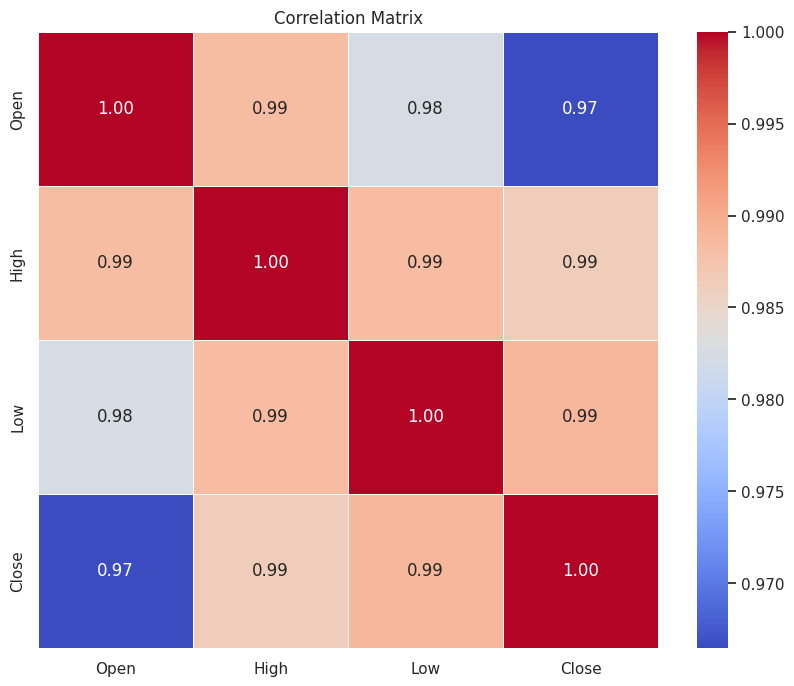

In [11]:
# Install and import necessary libraries for visualization
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


# Customize the visualization with seaborn heatmap
sns.set(style="whitegrid")  # Set the background style
plt.figure(figsize=(10, 8))  # Set the figure size

# Create and display the heatmap
sns.heatmap(correlation_pandas_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")  # Add a title
plt.show()


# Using **Silhouette** to Evaluate K-Means for clustring

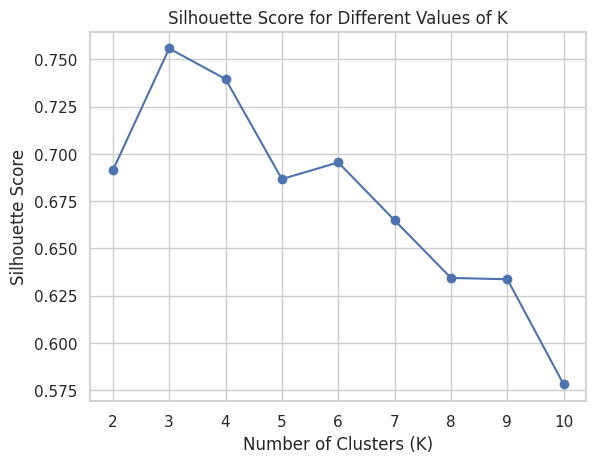

In [12]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler


cluster_columns = ['Open', 'High', 'Low', 'Close']

# Create a feature vector by assembling the selected columns
feature_assembler_cluster = VectorAssembler(inputCols=cluster_columns, outputCol='features')
clustered_data = feature_assembler_cluster.transform(spark_stock_df)

# Iterate over different values of K (from 2 to 10)
k_values = range(2, 11)
silhouette_scores = []

for k_value in k_values:
    # Train a K-Means model
    kmeans = KMeans(k=k_value, featuresCol='features', predictionCol='prediction')
    model = kmeans.fit(clustered_data)

    # Ensure that the number of clusters is greater than one before evaluating silhouette score
    if k_value > 1:
        # Make predictions
        predictions = model.transform(clustered_data)

        # Evaluate K-Means clustering using Silhouette Score
        evaluator_silhouette = ClusteringEvaluator()
        silhouette_score = evaluator_silhouette.evaluate(predictions)
        silhouette_scores.append(silhouette_score)
    else:
        silhouette_scores.append(None)

# Plot the Silhouette Score values for different K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of K')
plt.show()


base on Silhoutte score we can consider k = 3 or k = 4

# Using **Elbow** to Evaluate K-Means for clustring

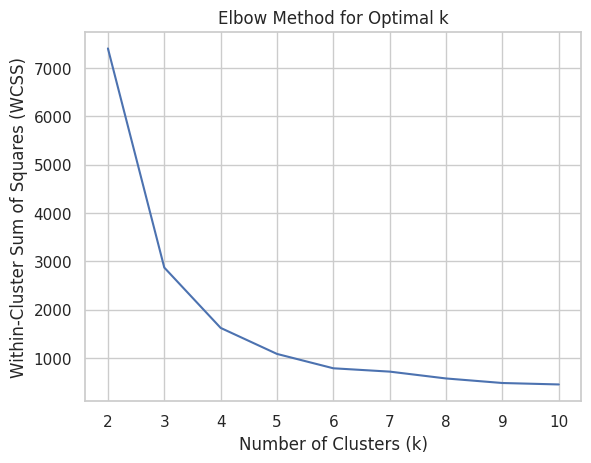

In [13]:
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt


cluster_columns = ['Open', 'High', 'Low', 'Close']
feature_assembler_cluster = VectorAssembler(inputCols=cluster_columns, outputCol='features')
clustered_data = feature_assembler_cluster.transform(spark_stock_df)

wcss = []

for k in range(2, 11):
    kmeans = KMeans(k=k, featuresCol='features', predictionCol='prediction')
    model = kmeans.fit(clustered_data)
    wcss.append(model.summary.trainingCost)

# Plot the Elbow Method results
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


based on Elbow we can choose k=4 and k=5

# Using **PCA** to visualize clusters for diffrent K values between 2 and 6

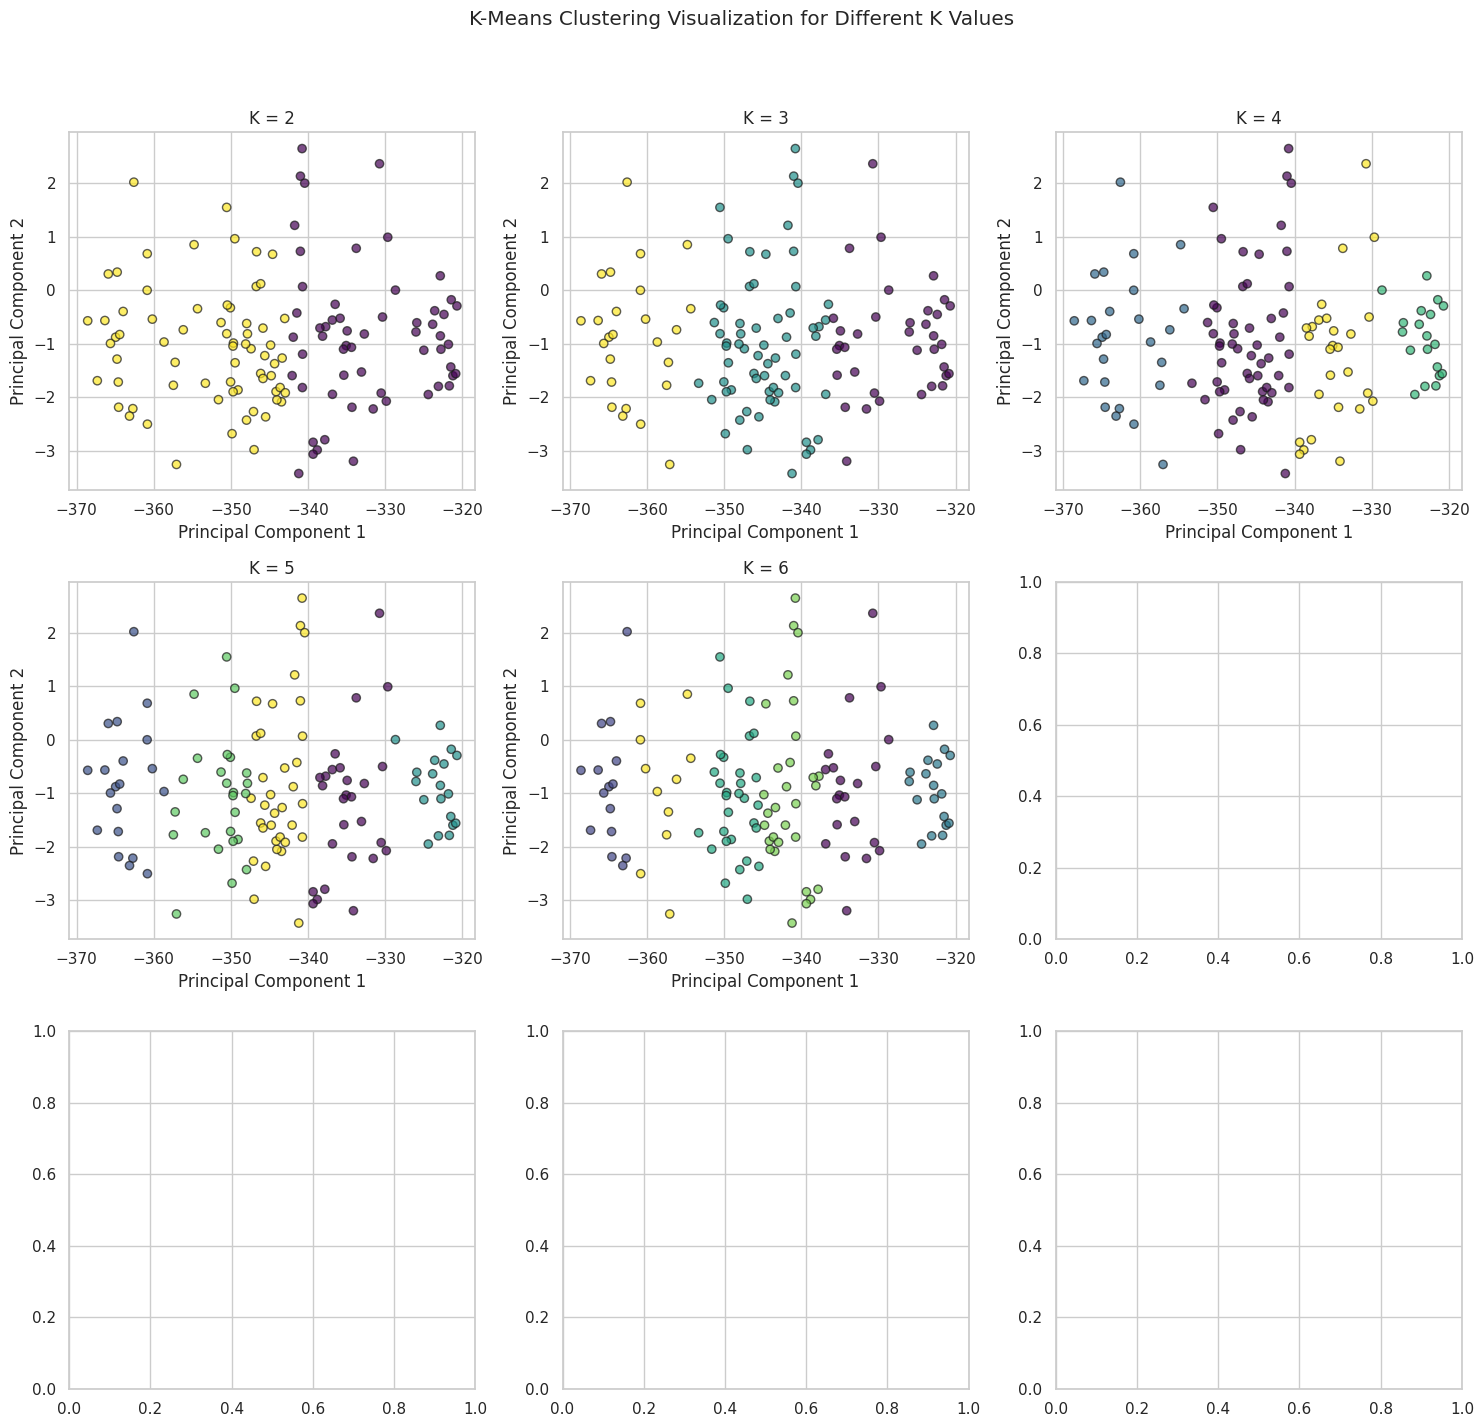

In [14]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import PCA
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

# Collect the PCA features for clustering
features = clustered_data.select('features').collect()

# Convert to a Pandas DataFrame for easier manipulation
pandas_df = pd.DataFrame(features, columns=['features'])

# Define the range of K values
k_values = range(2, 7)

# Create subplots for each K
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('K-Means Clustering Visualization for Different K Values')

# Flatten the axs array for easy iteration
axs = axs.flatten()

for i, k in enumerate(k_values):
    # Perform K-Means clustering
    kmeans = KMeans(k=k, featuresCol='features', predictionCol='prediction')
    model = kmeans.fit(clustered_data)
    predictions = model.transform(clustered_data)

    # Perform PCA
    pca = PCA(k=2, inputCol='features', outputCol='pca_features')
    pca_model = pca.fit(predictions)
    reduced_data = pca_model.transform(predictions)

    # Collect data for plotting
    pca_data = reduced_data.select('pca_features', 'prediction').collect()

    # Unpack the data for plotting
    pca_values = [x['pca_features'] for x in pca_data]
    cluster_predictions = [x['prediction'] for x in pca_data]

    # Plot the PCA visualization for each K
    axs[i].scatter([val[0] for val in pca_values], [val[1] for val in pca_values], c=cluster_predictions, cmap='viridis', edgecolors='k', alpha=0.7)
    axs[i].set_title(f'K = {k}')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# Clustring our stocks based on the best **K-Mean** value

based on the results of **Silhoutte** and **Elbow** and **PCA** we decided to choose **K = 4** for better clustring and predictions

In [18]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

# Initialize Spark Session
spark = SparkSession.builder.master("local").appName("StockAnalysis").getOrCreate()

# Convert Pandas DataFrame to Spark DataFrame
spark_df = spark.createDataFrame(data)

# Select relevant columns for clustering
selected_columns = ['Open', 'High', 'Low', 'Close']

# Create a feature vector by assembling selected columns
vector_assembler = VectorAssembler(inputCols=selected_columns, outputCol='features')
cluster_data = vector_assembler.transform(spark_df)

# Define the number of clusters
num_clusters = 4

# Create a K-Means model
kmeans = KMeans().setK(num_clusters).setSeed(1)

# Fit the model to the data
model = kmeans.fit(cluster_data)

# Get the cluster assignments for each stock
clustered_data = model.transform(cluster_data)

# Show all rows for each cluster
for cluster_id in range(num_clusters):
    print(f"Cluster {cluster_id} Rows:")
    clustered_data.filter(clustered_data['prediction'] == cluster_id).show(truncate=False)



Cluster 0 Rows:
+------------------+------------------+------------------+------------------+------------------+-------+-----------------------------------------------------------------------------+----------+
|Open              |High              |Low               |Close             |Adj Close         |Volume |features                                                                     |prediction|
+------------------+------------------+------------------+------------------+------------------+-------+-----------------------------------------------------------------------------+----------+
|171.02000427246094|172.69000244140625|170.89999389648438|172.2899932861328 |169.3135986328125 |1280800|[171.02000427246094,172.69000244140625,170.89999389648438,172.2899932861328] |0         |
|171.44000244140625|172.85000610351562|171.16000366210938|172.64999389648438|169.66738891601562|827100 |[171.44000244140625,172.85000610351562,171.16000366210938,172.64999389648438]|0         |
|172.880004882

# Visualizing the distributions in each of the predicted clusters

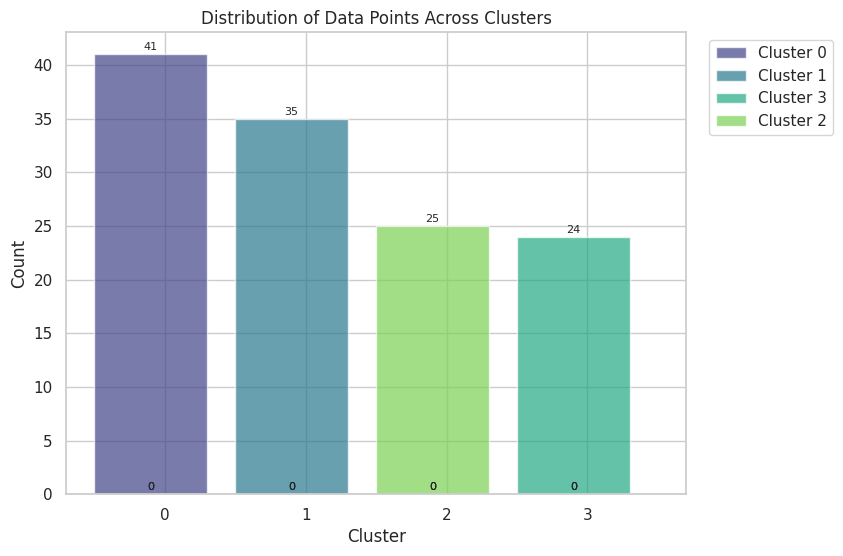

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Convert Spark DataFrame to Pandas for easy plotting
clustered_pd = clustered_data.select('prediction').toPandas()

# Get unique cluster labels
unique_clusters = clustered_pd['prediction'].unique()

# Create a custom color mapping for each cluster
color_mapping = dict(zip(unique_clusters, sns.color_palette('viridis', n_colors=len(unique_clusters))))

# Plot the histogram of cluster assignments using matplotlib
plt.figure(figsize=(8, 6))

for label, color in color_mapping.items():
    counts, bins, _ = plt.hist(clustered_pd[clustered_pd['prediction'] == label]['prediction'],
                               bins=np.arange(num_clusters + 1) - 0.5, color=color, label=f'Cluster {label}', alpha=0.7, width=0.8)

    # Add text labels for each bar
    for count, bin_value in zip(counts, bins[:-1]):
        plt.text(bin_value + 0.4, count + 0.2, str(int(count)), ha='center', va='bottom', fontsize=8)

plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(range(num_clusters))  # Ensure all clusters are shown on the x-axis
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))  # Move legend to the right of the plot

plt.show()





# Visualizing the Data and the respected cluster in a 3D plain

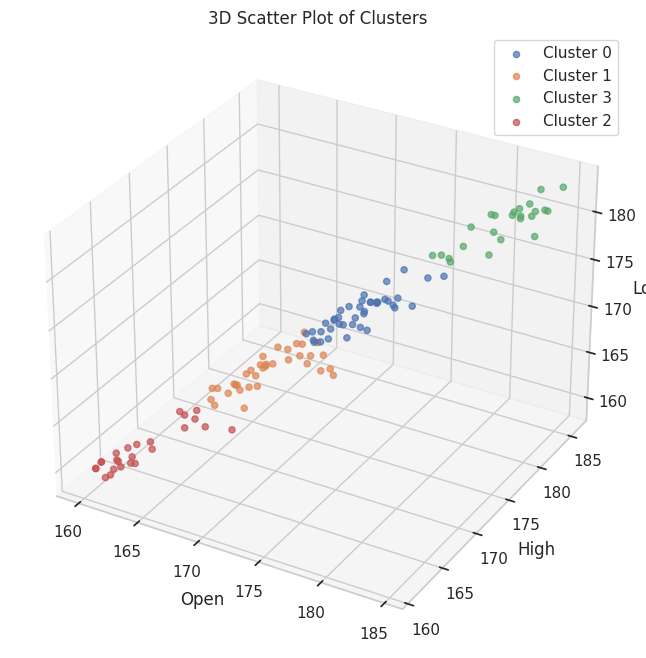

In [20]:

feature_columns = ['Open', 'High', 'Low']


clustered_pd = clustered_data.select('prediction', *feature_columns).toPandas()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate through unique clusters and plot data points
for cluster in clustered_pd['prediction'].unique():
    cluster_data = clustered_pd[clustered_pd['prediction'] == cluster]
    ax.scatter(
        cluster_data[feature_columns[0]],
        cluster_data[feature_columns[1]],
        cluster_data[feature_columns[2]],
        label=f'Cluster {cluster}',
        alpha=0.7  # Adjust transparency for better visibility
    )

# Set axis labels
ax.set_xlabel(feature_columns[0])
ax.set_ylabel(feature_columns[1])
ax.set_zlabel(feature_columns[2])

# Add legend and title
ax.legend()
plt.title("3D Scatter Plot of Clusters")

plt.show()


